# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [165]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16

In [166]:
study_results.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0

In [167]:
# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')
#joined_data = mouse_metadata.join(study_results, lsuffix='Mouse ID', rsuffix='Mouse ID', how="left")
# Display the data table for preview
merged_data.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [168]:
# Checking the number of mice.
len((merged_data['Mouse ID']).unique())

249

In [169]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_rows = merged_data[merged_data.duplicated()]
duplicated_rows

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   

     Tumor Volume (mm3)  Metastatic Sites  
909                45.0                 0

In [170]:
# Optional: Get all the data for the duplicate mouse ID. 


In [171]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data.loc[merged_data['Mouse ID'] != 'g989']
cleaned_data.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [172]:
# Checking the number of mice in the clean DataFrame.
len((cleaned_data['Mouse ID']).unique())

248

In [251]:
(cleaned_data['Mouse ID']).unique()

array(['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546',
       'z578', 'j913', 'u364', 'n364', 'y793', 'r554', 'm957', 'c758',
       't565', 'a644', 'i177', 'j989', 'i738', 'a520', 'w914', 'r811',
       'g288', 'i334', 'q610', 'd251', 'l897', 'c458', 'b742', 'b128',
       'j246', 'a411', 'j119', 'w150', 'v923', 'g316', 's710', 'l509',
       'r944', 'e662', 'u196', 'q597', 'a444', 'i557', 'r921', 'w678',
       'y449', 'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a457',
       'a492', 'a577', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963',
       'b313', 'b447', 'b487', 'b559', 'b759', 'b879', 'c139', 'c264',
       'c282', 'c302', 'c326', 'c402', 'c559', 'c580', 'c757', 'c766',
       'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd474', 'e213',
       'e227', 'e291', 'e476', 'e584', 'f129', 'f234', 'f278', 'f345',
       'f394', 'f436', 'f545', 'f932', 'f993', 'g107', 'g296', 'g497',
       'g558', 'g570', 'g867', 'h246', 'h333', 'h428', 'h531', 'i386',
      

## Summary Statistics

In [173]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_df = cleaned_data[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').mean()
summary_df['Mean Tumor Volume'] = cleaned_data[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').mean()
summary_df['Median Tumor Volume'] = cleaned_data[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').median()
summary_df['Tumor Volume Variance'] = cleaned_data[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').var()
summary_df['Tumor Volume Std. Dev.'] = cleaned_data[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').std()
summary_df['Tumor Volume Std. Err.'] = cleaned_data[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').sem()
summary_df = summary_df.drop(columns=['Tumor Volume (mm3)'])

summary_df.head()

Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466

In [174]:


# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_df = cleaned_data[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
agg_df.head()


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

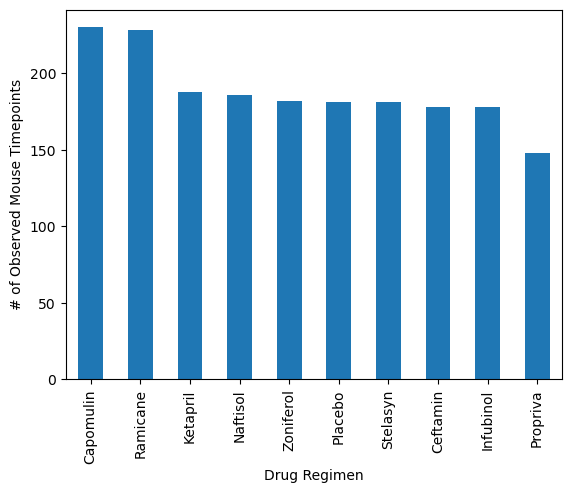

In [175]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
cleaned_data.value_counts('Drug Regimen').plot(kind='bar', ylabel='# of Observed Mouse Timepoints')


<function matplotlib.pyplot.show(close=None, block=None)>

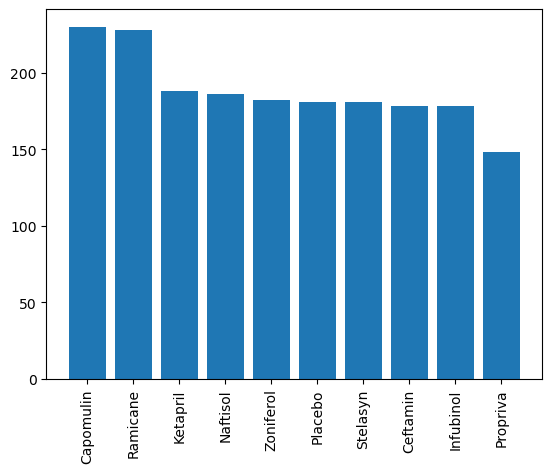

In [176]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
bar_series = cleaned_data.value_counts('Drug Regimen')
plt.bar(bar_series.index, bar_series.values)
plt.xticks(rotation=90)
plt.show

<AxesSubplot:ylabel='Sex'>

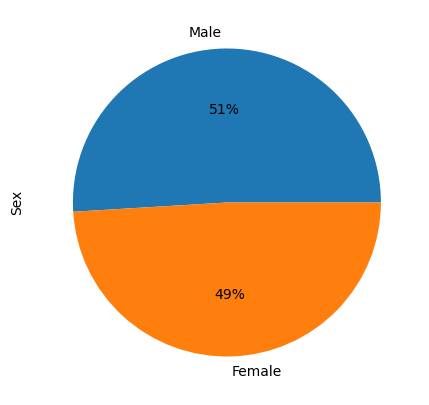

In [177]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
cleaned_data.value_counts('Sex').plot.pie(y="Sex", figsize=(5,5), label='Sex', autopct='%1.0f%%')

<function matplotlib.pyplot.show(close=None, block=None)>

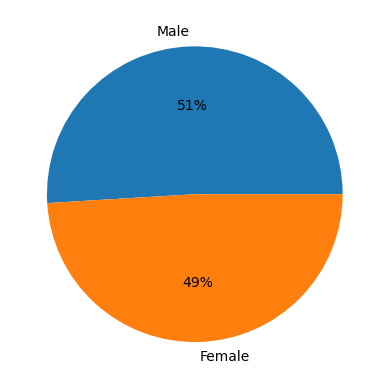

In [178]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(cleaned_data.value_counts('Sex'), labels=['Male', 'Female'], autopct='%1.0f%%')
#plt.xticks(rotation=90)
plt.show

In [179]:
cleaned_data.max()

Mouse ID                   z969
Drug Regimen          Zoniferol
Sex                        Male
Age_months                   24
Weight (g)                   30
Timepoint                    45
Tumor Volume (mm3)    78.567014
Metastatic Sites              4
dtype: object

## Quartiles, Outliers and Boxplots

In [180]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
timepoint_df = cleaned_data[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)', 'Timepoint']].query("Timepoint in [45]")
# Start by getting the last (greatest) timepoint for each house
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
ordered_df = timepoint_df[timepoint_df['Drug Regimen'].isin(drug_list)]
ordered_df
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


Mouse ID Drug Regimen  Tumor Volume (mm3)  Timepoint
9        k403     Ramicane           22.050126         45
19       s185    Capomulin           23.343598         45
29       x401    Capomulin           28.484033         45
39       m601    Capomulin           28.430964         45
49       g791     Ramicane           29.128472         45
...       ...          ...                 ...        ...
1797     x822     Ceftamin           61.386660         45
1813     y163    Infubinol           67.685569         45
1845     y769     Ceftamin           68.594745         45
1855     y865     Ceftamin           64.729837         45
1872     z581    Infubinol           62.754451         45

[63 rows x 4 columns]

In [181]:
ordered_df.iloc[0]['Mouse ID']

'k403'

In [210]:
tumor_data = ordered_df['Tumor Volume (mm3)']
capomulin = ordered_df[ordered_df['Drug Regimen'].isin(['Capomulin'])]['Tumor Volume (mm3)']
ramicane = ordered_df[ordered_df['Drug Regimen'].isin(['Ramicane'])]['Tumor Volume (mm3)']
ceftamin = ordered_df[ordered_df['Drug Regimen'].isin(['Ceftamin'])]['Tumor Volume (mm3)']
infubinol = ordered_df[ordered_df['Drug Regimen'].isin(['Infubinol'])]['Tumor Volume (mm3)']

In [211]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = []
for i in range(len(ordered_df)):
    regimens.append(ordered_df.iloc[i]['Drug Regimen'])
    
# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []
for i in range(len(ordered_df)):
    tumor_list.append(ordered_df.iloc[i]['Tumor Volume (mm3)'])
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = tumor_data.quantile([.25, .5, .75])
lowerq= quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

    


Values below -9.513252184999999 could be outliers.
Values above 105.135493215 could be outliers.


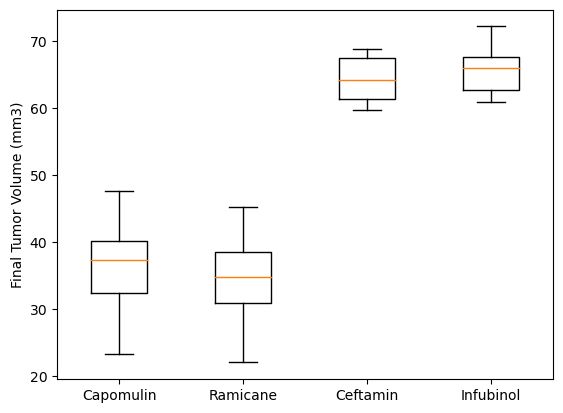

In [215]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatments = [capomulin, ramicane, ceftamin, infubinol]
fig1, ax1 = plt.subplots()
ax1.boxplot(treatments)
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(('Capomulin', 'Ramicane', 'Ceftamin', 'Infubinol'))
plt.show()

## Line and Scatter Plots

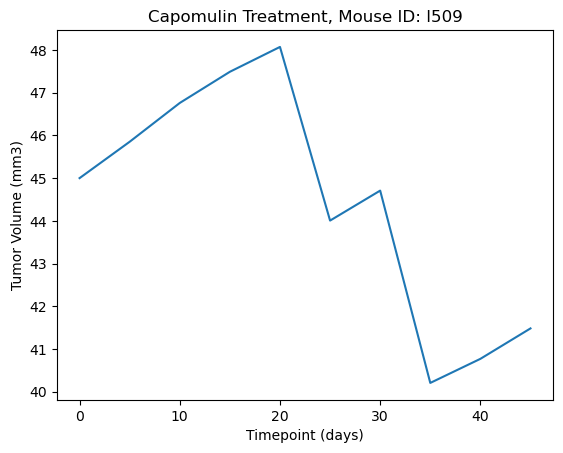

In [237]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_line_df = cleaned_data.loc[cleaned_data['Mouse ID']=='l509']
cap_line_df['Tumor Volume (mm3)']
plt.plot(cap_line_df['Timepoint'], cap_line_df['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment, Mouse ID: l509')
plt.show()

In [250]:
cap_df = cleaned_data.loc[cleaned_data['Drug Regimen']=='Capomulin']
weight_list = []
avg_vol_list = []
for i in range(len(cap_df['Mouse ID']).unique()):
    weight_list.append(cap_df['Weight (g)'])

weight_list
#plt.scatter(cap_df['Weight (g)'], cap_df['Tumor Volume (mm3)'].mean())

[10      17
 11      17
 12      17
 13      17
 14      17
         ..
 440     24
 1452    25
 1453    25
 1454    25
 1455    25
 Name: Weight (g), Length: 230, dtype: int64,
 10      17
 11      17
 12      17
 13      17
 14      17
         ..
 440     24
 1452    25
 1453    25
 1454    25
 1455    25
 Name: Weight (g), Length: 230, dtype: int64,
 10      17
 11      17
 12      17
 13      17
 14      17
         ..
 440     24
 1452    25
 1453    25
 1454    25
 1455    25
 Name: Weight (g), Length: 230, dtype: int64,
 10      17
 11      17
 12      17
 13      17
 14      17
         ..
 440     24
 1452    25
 1453    25
 1454    25
 1455    25
 Name: Weight (g), Length: 230, dtype: int64,
 10      17
 11      17
 12      17
 13      17
 14      17
         ..
 440     24
 1452    25
 1453    25
 1454    25
 1455    25
 Name: Weight (g), Length: 230, dtype: int64,
 10      17
 11      17
 12      17
 13      17
 14      17
         ..
 440     24
 1452    25
 1453    25
 1

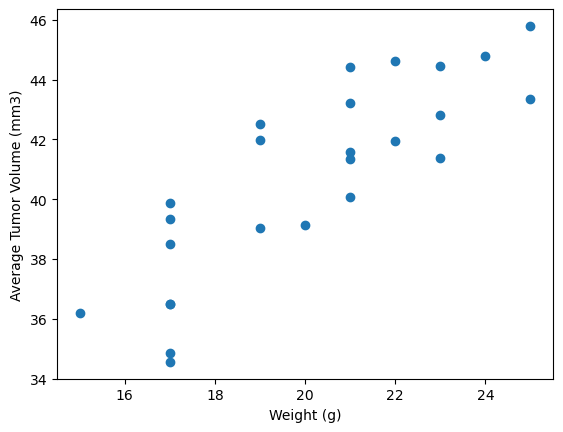

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


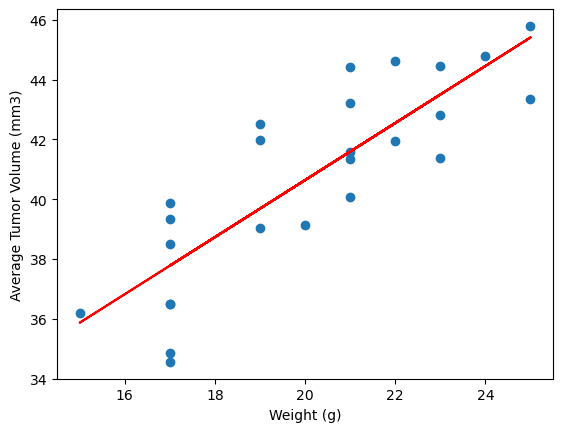

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
